## 프로젝트: ResNet Ablation Study

### 1) ResNet 기본 블록 구성하기

In [33]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds
from keras.layers import BatchNormalization, Conv2D, Activation, Dense, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, ZeroPadding2D, Add

In [34]:
# 사이즈가 달라지는 sortcut
def shortcut_1(x, channel, num_cnn, stage_num, i):
    
    shortcut = x
    
    x = Conv2D(channel, (3, 3), strides=(2,2), padding ='same',name=f'stage{stage_num}_{i+1}_conv1')(x)
    x = BatchNormalization(name=f'stage{stage_num}_{i+1}_bn1')(x)
    x = Activation('relu')(x)

    x = Conv2D(channel, (3, 3), strides=(1,1), padding='same')(x)
    shortcut = Conv2D(channel, (1, 1), strides=(2,2), padding='same', name=f'stage{stage_num}_{i+1}_conv2')(shortcut)
    x = BatchNormalization()(x)
    shortcut = BatchNormalization(name=f'stage{stage_num}_{i+1}_bn2')(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

In [35]:
# 사이즈 동일 shorcut
def shortcut_2(x, channel, num_cnn, stage_num, i):
    
    shortcut = x
    
    x = Conv2D(channel, (3, 3), strides=(1,1), padding='same', name=f'stage{stage_num}_{i+1}_conv1')(x)
    x = BatchNormalization(name=f'stage{stage_num}_{i+1}_bn1')(x)
    x = Activation('relu')(x)

    x = Conv2D(channel, (3, 3), strides=(1,1), padding='same', name=f'stage{stage_num}_{i+1}_conv2')(x)
    x = BatchNormalization(name=f'stage{stage_num}_{i+1}_bn2')(x)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

In [36]:
def conv1_res34(x):
    x = Conv2D(64, (7, 7), strides=(2,2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    return x

def conv2_x_res34(x, channel, num_cnn, stage_num):
    
    for i in range(num_cnn):
        if i==0:
            x = MaxPooling2D((3, 3), 2, padding='same',name=f'stage{stage_num}_0_maxpooling')(x)
            x = shortcut_2(x, channel,num_cnn,stage_num, i)           
            
        else:
            x = shortcut_2(x, channel,num_cnn,stage_num, i)

            
    return x

def convn_x_res34(x, channel, num_cnn, stage_num):
    
    for i in range(num_cnn):
        if i==0:
            x = shortcut_1(x, channel,num_cnn,stage_num, i)           
            
        else:
            x = shortcut_2(x, channel,num_cnn,stage_num, i)
            
    return x

In [37]:
# 사이즈가 달라지는 sortcut
def shortcut_3(x, channel, num_cnn, stage_num, i):
    
    shortcut = x

    x = Conv2D(channel, (1, 1), strides=(2,2), padding='valid', name=f'stage{stage_num}_{i+1}_conv1')(x)
    x = BatchNormalization(name=f'stage{stage_num}_{i+1}_bn1')(x)
    x = Activation('relu')(x)

    x = Conv2D(channel, (3, 3), strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    shortcut = Conv2D(channel*4, (1, 1), strides=(2,2), padding='valid')(shortcut)
    x = Conv2D(channel*4, (1, 1), strides=(1,1), padding='valid')(x)
    shortcut = BatchNormalization()(shortcut)
    x = BatchNormalization()(x)    
    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

In [38]:
# 사이즈 동일 shorcut
def shortcut_4(x, channel, num_cnn, stage_num, i):    
    shortcut = x
    
    x = Conv2D(channel, (1, 1), strides=(1,1), padding='valid', name=f'stage{stage_num}_{i+1}_conv1')(x)
    x = BatchNormalization(name=f'stage{stage_num}_{i+1}_bn1')(x)
    x = Activation('relu')(x)
    
    x = Conv2D(channel, (3, 3), strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)    
    
    x = Conv2D(channel*4, (1, 1), strides=(1,1), padding='valid')(x)
    x = BatchNormalization()(x) 

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

In [39]:
def conv1_res50(x):
    
    x = Conv2D(64, (7, 7), strides=(2,2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    return x

def conv2_x_res50(x, channel, num_cnn, stage_num):
    
    for i in range(num_cnn):
        if i==0:
            x = MaxPooling2D((3, 3), 2, padding='same')(x)
            shortcut = x                        
    
            x = Conv2D(64, (1, 1), strides=(1,1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            
            x = Conv2D(64, (3, 3), strides=(1,1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
    
            x = Conv2D(256, (1, 1), strides=(1,1), padding='valid')(x)
            shortcut = Conv2D(256, (1, 1), strides=(1,1), padding='valid')(shortcut)
            x = BatchNormalization()(x)
            shortcut = BatchNormalization()(shortcut)
            
            x = Add()([x, shortcut])
            x = Activation('relu')(x)
                        
        else:
            x = shortcut_4(x, channel, num_cnn, stage_num, i)
            
    return x

def convn_x_res50(x, channel, num_cnn, stage_num):
    
    for i in range(num_cnn):
        if i==0:             
            x = shortcut_3(x, channel, num_cnn, stage_num, i)         
        else:
            x = shortcut_4(x, channel, num_cnn, stage_num, i)
            
    return x

### 2) ResNet-34, ResNet-50 Complete Model

In [40]:
def build_resnet(input_shape, is_50):
    input_layer = keras.layers.Input(shape=input_shape)
    
    if is_50:
        block_output = resnet_50(input_layer)
    else:
        block_output = resnet_34(input_layer)
        
    model = keras.Model(inputs=input_layer, outputs=block_output) 
    
    return model

In [41]:
def resnet_34(x,
              num_cnn_list=[3,4,6,3],
              channel_list=[64, 128, 256, 512]):
    
    x = conv1_res34(x)
    
    for i, (num_cnn, channel) in enumerate(zip(num_cnn_list, channel_list)):
        if  i == 0:
            x = conv2_x_res34(x, channel, num_cnn, i+2)
        else:
            x = convn_x_res34(x, channel, num_cnn, i+2)
    
    x = AveragePooling2D(pool_size=(1, 1), name='avg_pool')(x)
    x = keras.layers.Flatten(name='flatten')(x)
    x = keras.layers.Dense(2, activation='softmax', name='fc10000')(x)
    
    return x

In [42]:
def resnet_50(x,
              num_cnn_list=[3,4,6,3],
              channel_list=[64, 128, 256, 512]):
    
    x = conv1_res50(x)
    
    for i, (num_cnn, channel) in enumerate(zip(num_cnn_list, channel_list)):
        if  i == 0:
            x = conv2_x_res34(x, channel, num_cnn, i+2)
        else:
            x = convn_x_res34(x, channel, num_cnn, i+2)
    
    x = AveragePooling2D(pool_size=(1, 1), name='avg_pool')(x)
    x = keras.layers.Flatten(name='flatten')(x)
    x = keras.layers.Dense(2, activation='softmax', name='fc10000')(x)
    
    return x

In [43]:
resnet_34 = build_resnet(input_shape=(224, 224,3), is_50=False)
resnet_34.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_174 (Conv2D)             (None, 112, 112, 64) 9472        input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_174 (BatchN (None, 112, 112, 64) 256         conv2d_174[0][0]                 
__________________________________________________________________________________________________
activation_164 (Activation)     (None, 112, 112, 64) 0           batch_normalization_174[0][0]    
____________________________________________________________________________________________

In [44]:
resnet_50 = build_resnet(input_shape=(224, 224, 3), is_50=True)
resnet_50.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_178 (Conv2D)             (None, 112, 112, 64) 9472        input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_178 (BatchN (None, 112, 112, 64) 256         conv2d_178[0][0]                 
__________________________________________________________________________________________________
activation_197 (Activation)     (None, 112, 112, 64) 0           batch_normalization_178[0][0]    
____________________________________________________________________________________________

### 3) 일반 네트워크(plain network) 만들기

In [45]:
# 사이즈 작아지는 블록
def p34_block_1(x, channel):
    x = Conv2D(channel, (3, 3), strides=(2,2), padding ='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(channel, (3, 3), strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    return x

In [46]:
# 사이즈 그대로 블록
def p34_block_2(x, channel):
    x = Conv2D(channel, (3, 3), strides=(1,1), padding ='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(channel, (3, 3), strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    return x

In [47]:
def conv1_plain34(x):
    x = Conv2D(64, (7, 7), strides=(2,2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    return x

def conv2_x_plain34(x, channel, num_cnn):
    
    for i in range(num_cnn):
        if i==0:
            x = MaxPooling2D((3, 3), 2, padding='same')(x)
            x = p34_block_1(x, channel)           
            
        else:
            x = p34_block_1(x, channel)
            
    return x

def convn_x_plain34(x, channel, num_cnn):
        
    for i in range(num_cnn):
        if i==0:
            x = p34_block_2(x, channel)
            
        else:
            x = p34_block_1(x, channel)
            
    return x

In [48]:
# 사이즈 작아지는 블록
def p50_block_1(x, channel):
    x = Conv2D(channel, (1, 1), strides=(2,2), padding='valid')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
            
    x = Conv2D(channel, (3, 3), strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)            
            
    x = Conv2D(channel*4, (1, 1), strides=(1,1), padding='valid')(x)
    x = BatchNormalization()(x)            
    x = Activation('relu')(x)
    
    return x

In [49]:
# 사이즈 그대로 블록
def p50_block_2(x, channel):
    x = Conv2D(channel, (1, 1), strides=(1,1), padding='valid')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
            
    x = Conv2D(channel, (3, 3), strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)            
            
    x = Conv2D(channel*4, (1, 1), strides=(1,1), padding='valid')(x)
    x = BatchNormalization()(x)            
    x = Activation('relu')(x)
    
    return x

In [50]:
def conv1_plain50(x):
    
    x = ZeroPadding2D(padding=(3, 3))(x)
    
    x = Conv2D(64, (7, 7), strides=(2,2), padding='valid')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    return x

def conv2_x_plain50(x, channel, num_cnn):
    x = ZeroPadding2D(padding=(1, 1))(x)
    
    for i in range(num_cnn):
        if i==0:
            x = MaxPooling2D((3, 3), 2, padding='valid')(x)
    
            x = p50_block_2(x, channel)
            
            
        else:
            x = p50_block_2(x, channel)            
            
    return x

def convn_x_plain50(x, channel, num_cnn):

    for i in range(4):
        if i==0:             
            x = p50_block_1(x, channel)
                        
        else:
            x = p50_block_2(x, channel)
            
            
    return x

In [51]:
def plain_34(x):
    
    x = conv1_plain34(x)
    x = conv2_x_plain34(x, 64, 3)
    x = convn_x_plain34(x, 128, 4)
    x = convn_x_plain34(x, 256, 6)
    x = convn_x_plain34(x, 512, 3)
    
    x = AveragePooling2D(pool_size=(1, 1), name='avg_pool')(x)
    x = keras.layers.Flatten(name='flatten')(x)
    x = keras.layers.Dense(2, activation='softmax', name='fc10000')(x)
    
    return x

In [52]:
def plain_50(x):
    
    x = conv1_plain50(x)
    x = conv2_x_plain50(x, 64, 3)
    x = convn_x_plain50(x, 128, 4)
    x = convn_x_plain50(x, 256, 6)
    x = convn_x_plain50(x, 512, 3)
    
    x = AveragePooling2D(pool_size=(1, 1), name='avg_pool')(x)
    x = keras.layers.Flatten(name='flatten')(x)
    x = keras.layers.Dense(2, activation='softmax', name='fc10000')(x)    
    
    return x

In [53]:
def build_plainnet(input_shape, is_50):
    input_layer = keras.layers.Input(shape=input_shape)
    
    if is_50:
        block_output = plain_50(input_layer)
    else:
        block_output = plain_34(input_layer)
        
    model = keras.Model(inputs=input_layer, outputs=block_output) 
    
    return model

In [54]:
plain_34 = build_plainnet(input_shape=(224, 224, 3), is_50=False)
plain_34.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_182 (Conv2D)          (None, 112, 112, 64)      9472      
_________________________________________________________________
batch_normalization_182 (Bat (None, 112, 112, 64)      256       
_________________________________________________________________
activation_230 (Activation)  (None, 112, 112, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_183 (Conv2D)          (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_183 (Bat (None, 28, 28, 64)        256 

In [55]:
plain_50 = build_plainnet(input_shape=(224, 224, 3), is_50=True)
plain_50.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
zero_padding2d_4 (ZeroPaddin (None, 230, 230, 3)       0         
_________________________________________________________________
conv2d_215 (Conv2D)          (None, 112, 112, 64)      9472      
_________________________________________________________________
batch_normalization_215 (Bat (None, 112, 112, 64)      256       
_________________________________________________________________
activation_263 (Activation)  (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_5 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 64)        0   

## cats_vs_dogs 데이터셋 불러오기

In [16]:
BATCH_SIZE = 16
EPOCH = 20

In [17]:
def normalize_and_resize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    image = tf.image.resize(image, [224,224])
    return tf.cast(image, tf.float32) / 255., label

In [18]:
def apply_normalize_on_dataset(ds, is_test=False, batch_size=16):
    ds = ds.map(
        normalize_and_resize_img, 
        num_parallel_calls=1
    )
    ds = ds.batch(batch_size)
    if not is_test:
        ds = ds.repeat()
        ds = ds.shuffle(200)
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    return ds

In [19]:
import urllib3
urllib3.disable_warnings()

#tfds.disable_progress_bar()   # 이 주석을 풀면 데이터셋 다운로드과정의 프로그레스바가 나타나지 않습니다.

(ds_train, ds_test), ds_info = tfds.load(
    'cats_vs_dogs',
    split=('train[:80%]', 'train[-20%:]'),
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

ds_train = apply_normalize_on_dataset(ds_train, batch_size=BATCH_SIZE)
ds_test = apply_normalize_on_dataset(ds_test, batch_size=BATCH_SIZE)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling cats_vs_dogs-train.tfrecord...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Dataset cats_vs_dogs downloaded and prepared to /aiffel/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [20]:
print(ds_info.features)

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'image/filename': Text(shape=(), dtype=tf.string),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
})


In [21]:
# 데이터의 개수도 확인해 봅시다. 
print(tf.data.experimental.cardinality(ds_train))
print(tf.data.experimental.cardinality(ds_test))

tf.Tensor(-1, shape=(), dtype=int64)
tf.Tensor(-1, shape=(), dtype=int64)


In [22]:
ds_info.features["label"].num_classes # 라벨 수 확인

2

In [23]:
ds_info.features["label"].names # 라벨 이름 확인

['cat', 'dog']

In [24]:
# fig = tfds.show_examples(ds_train, ds_info) # 예제 보기

### 4) ResNet-50 vs Plain-50 또는 ResNet-34 vs Plain-34
### 4-1) ResNet-34 vs Plain-34

In [25]:
resnet_34.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.005, clipnorm=1.),
    metrics=['accuracy'],
)

history_r_34 = resnet_34.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train[:80%]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['train[-20%:]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/20
1163/1163 [==============================] - 343s 273ms/step - loss: 1.0316 - accuracy: 0.5417 - val_loss: 1.0000 - val_accuracy: 0.5649
Epoch 2/20
1163/1163 [==============================] - 326s 280ms/step - loss: 0.8691 - accuracy: 0.6040 - val_loss: 0.8896 - val_accuracy: 0.6128
Epoch 3/20
1163/1163 [==============================] - 310s 267ms/step - loss: 0.7709 - accuracy: 0.6339 - val_loss: 0.9361 - val_accuracy: 0.5791
Epoch 4/20
1163/1163 [==============================] - 310s 267ms/step - loss: 0.7045 - accuracy: 0.6692 - val_loss: 1.0840 - val_accuracy: 0.6388
Epoch 5/20
1163/1163 [==============================] - 310s 266ms/step - loss: 0.6382 - accuracy: 0.7016 - val_loss: 0.6415 - val_accuracy: 0.7017
Epoch 6/20
1163/1163 [==============================] - 310s 266ms/step - loss: 0.5463 - accuracy: 0.7471 - val_loss: 0.7030 - val_accuracy: 0.6918
Epoch 7/20
1163/1163 [==============================] - 310s 266ms/step - loss: 0.4464 - accuracy: 0.7981 - val_

In [26]:
plain_34.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.005, clipnorm=1.),
    metrics=['accuracy'],
)

history_p_34 = plain_34.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train[:80%]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['train[-20%:]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/20
1163/1163 [==============================] - 299s 249ms/step - loss: 0.8067 - accuracy: 0.5167 - val_loss: 0.9401 - val_accuracy: 0.5106
Epoch 2/20
1163/1163 [==============================] - 288s 248ms/step - loss: 0.7719 - accuracy: 0.5259 - val_loss: 0.9343 - val_accuracy: 0.5022
Epoch 3/20
1163/1163 [==============================] - 288s 247ms/step - loss: 0.7799 - accuracy: 0.5144 - val_loss: 0.9365 - val_accuracy: 0.5028
Epoch 4/20
1163/1163 [==============================] - 288s 247ms/step - loss: 0.7781 - accuracy: 0.5044 - val_loss: 1.2617 - val_accuracy: 0.4940
Epoch 5/20
1163/1163 [==============================] - 288s 247ms/step - loss: 0.7504 - accuracy: 0.5212 - val_loss: 0.8392 - val_accuracy: 0.5157
Epoch 6/20
1163/1163 [==============================] - 288s 248ms/step - loss: 0.7475 - accuracy: 0.5312 - val_loss: 1.0667 - val_accuracy: 0.5339
Epoch 7/20
1163/1163 [==============================] - 288s 247ms/step - loss: 0.7388 - accuracy: 0.5361 - val_

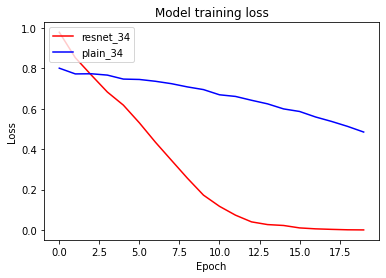

In [27]:
import matplotlib.pyplot as plt

plt.plot(history_r_34.history['loss'], 'r')
plt.plot(history_p_34.history['loss'], 'b')
plt.title('Model training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['resnet_34', 'plain_34'], loc='upper left')
plt.show()

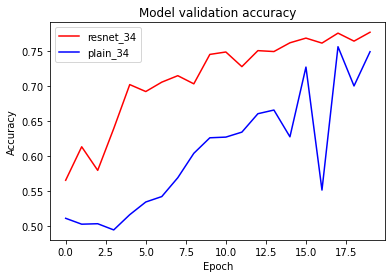

In [28]:
plt.plot(history_r_34.history['val_accuracy'], 'r')
plt.plot(history_p_34.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['resnet_34', 'plain_34'], loc='upper left')
plt.show()

### 4-2) ResNet-50 vs Plain-50

In [29]:
resnet_50.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.005, clipnorm=1.),
    metrics=['accuracy'],
)

history_r_50 = resnet_50.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train[:80%]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['train[-20%:]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/20
1163/1163 [==============================] - 569s 454ms/step - loss: 1.1399 - accuracy: 0.5318 - val_loss: 1.2334 - val_accuracy: 0.5539
Epoch 2/20
1163/1163 [==============================] - 488s 420ms/step - loss: 1.0485 - accuracy: 0.5524 - val_loss: 2.4557 - val_accuracy: 0.5162
Epoch 3/20
1163/1163 [==============================] - 491s 422ms/step - loss: 1.0016 - accuracy: 0.5661 - val_loss: 1.4281 - val_accuracy: 0.5116
Epoch 4/20
1163/1163 [==============================] - 489s 420ms/step - loss: 0.9798 - accuracy: 0.5776 - val_loss: 1.3081 - val_accuracy: 0.5498
Epoch 5/20
1163/1163 [==============================] - 488s 420ms/step - loss: 0.9624 - accuracy: 0.5689 - val_loss: 1.5182 - val_accuracy: 0.5815
Epoch 6/20
1163/1163 [==============================] - 490s 421ms/step - loss: 0.9302 - accuracy: 0.5809 - val_loss: 1.0262 - val_accuracy: 0.5658
Epoch 7/20
1163/1163 [==============================] - 488s 420ms/step - loss: 0.9144 - accuracy: 0.5826 - val_

In [30]:
plain_50.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.005, clipnorm=1.),
    metrics=['accuracy'],
)

history_p_50 = plain_50.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train[:80%]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['train[-20%:]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/20
1163/1163 [==============================] - 497s 415ms/step - loss: 0.8115 - accuracy: 0.5208 - val_loss: 0.8900 - val_accuracy: 0.5097
Epoch 2/20
1163/1163 [==============================] - 478s 411ms/step - loss: 0.8051 - accuracy: 0.5242 - val_loss: 1.4059 - val_accuracy: 0.5351
Epoch 3/20
1163/1163 [==============================] - 478s 411ms/step - loss: 0.8067 - accuracy: 0.5239 - val_loss: 1.2353 - val_accuracy: 0.5222
Epoch 4/20
1163/1163 [==============================] - 478s 411ms/step - loss: 0.8121 - accuracy: 0.5136 - val_loss: 0.9583 - val_accuracy: 0.5060
Epoch 5/20
1163/1163 [==============================] - 478s 411ms/step - loss: 0.8019 - accuracy: 0.5155 - val_loss: 0.9195 - val_accuracy: 0.4875
Epoch 6/20
1163/1163 [==============================] - 478s 411ms/step - loss: 0.8014 - accuracy: 0.5126 - val_loss: 2.7815 - val_accuracy: 0.5050
Epoch 7/20
1163/1163 [==============================] - 478s 411ms/step - loss: 0.8006 - accuracy: 0.5283 - val_

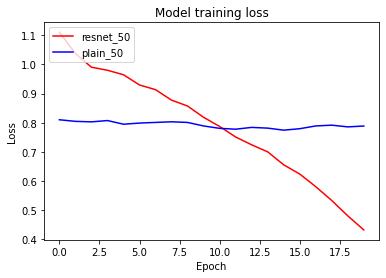

In [31]:
import matplotlib.pyplot as plt

plt.plot(history_r_50.history['loss'], 'r')
plt.plot(history_p_50.history['loss'], 'b')
plt.title('Model training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['resnet_50', 'plain_50'], loc='upper left')
plt.show()

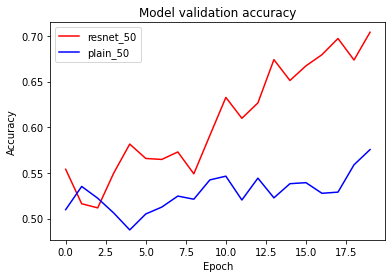

In [32]:
plt.plot(history_r_50.history['val_accuracy'], 'r')
plt.plot(history_p_50.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['resnet_50', 'plain_50'], loc='upper left')
plt.show()

## 회고
- 파라미터 수를 맞춰주다 보니깐 shortcut 커널 사이즈는 (1,1)이어야 하는데, 아직 그 이유는 모르겠다.
- 처음에 데이터 로드 할때 오류가 자꾸 나서 보니깐 cats_vs_dogs는 split을 다르게 해줘야했다.
- expected shape=(None, 224, 224, 3), found shape=(None, None, 3) 이런 오류가 자꾸 발생했는데, 입력 이미지의 사이즈를 입력하니깐 고쳐졌다.
- batch size를 32로도 해봤는데, resnet34의 loss가 plain34의 loss보다 값이 커서 다시 배치 사이즈를 줄이고, lr를 0.005로 고쳤다.

## 결과 비교
### 1) batch size = 16, learning rate = 0.01
|resnet34 vs plain34(loss)|resnet34 vs plain34(accuracy)|resnet50 vs plain50(loss)|resnet50 vs plain50(accuracy)|
|---|---|---|---|
|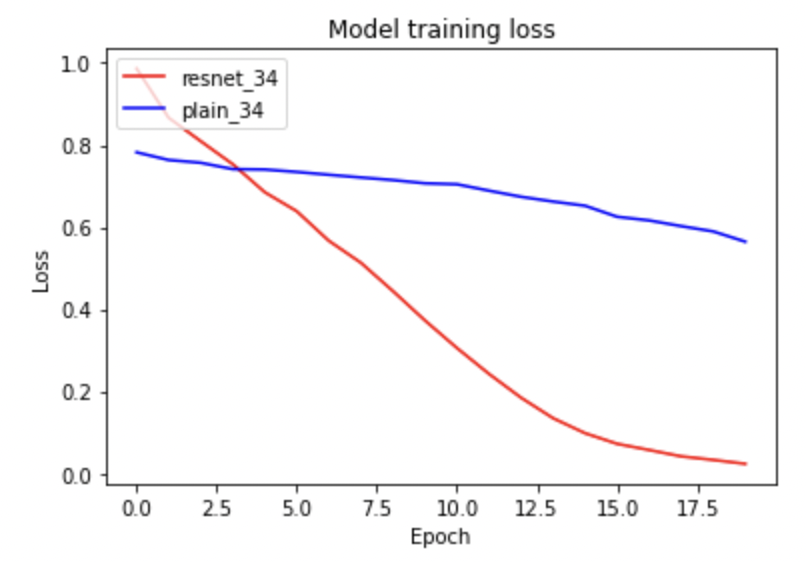|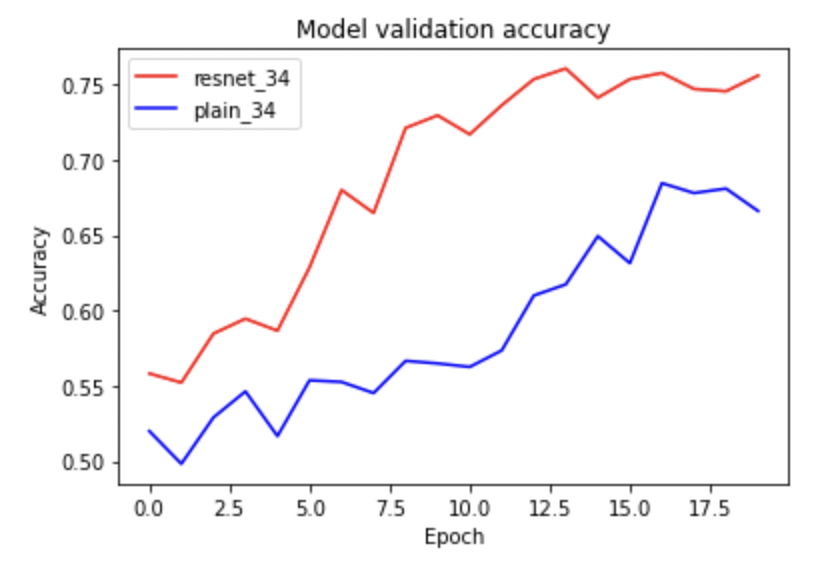|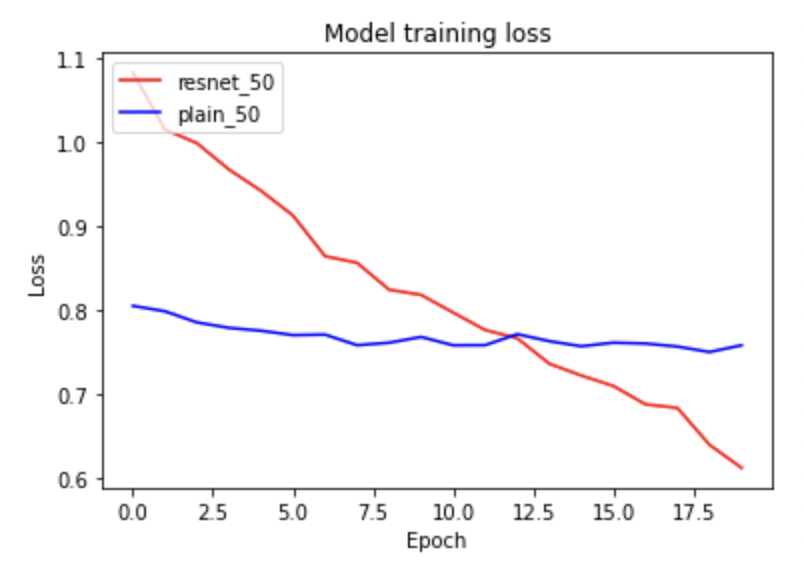|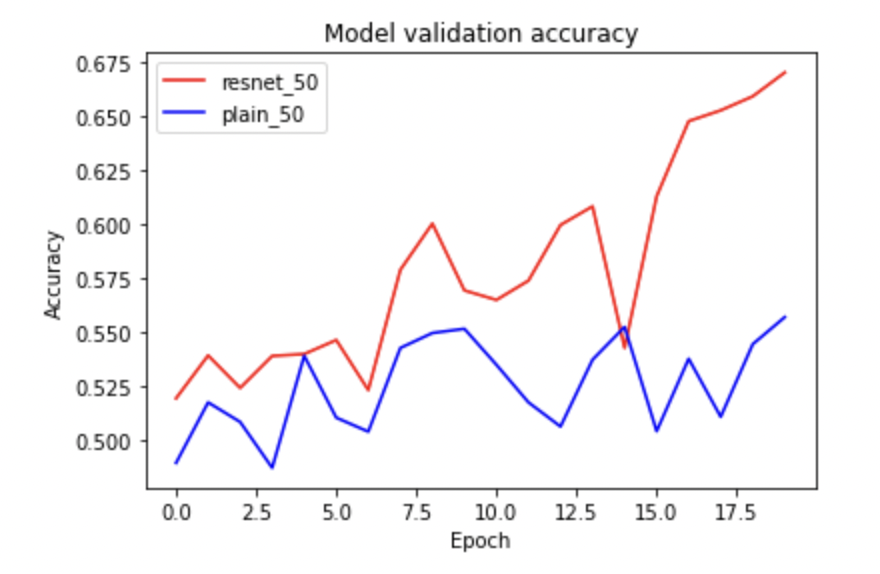|  

### 2) batch size = 32, learning rate = 0.01
|resnet34 vs plain34(loss)|resnet34 vs plain34(accuracy)|resnet50 vs plain50(loss)|resnet50 vs plain50(accuracy)|
|---|---|---|---|
|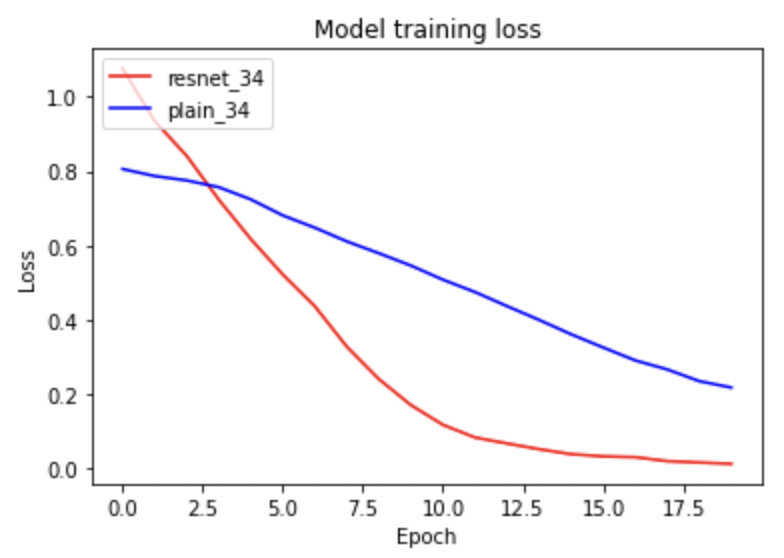|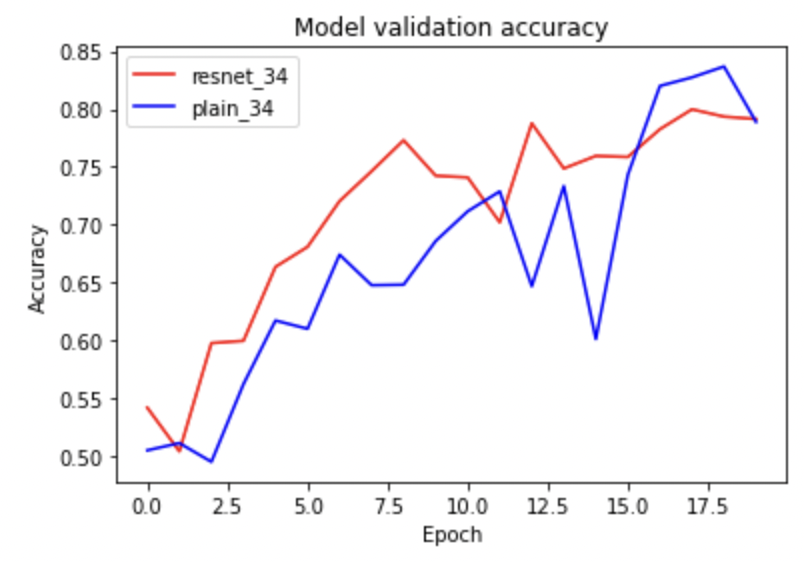|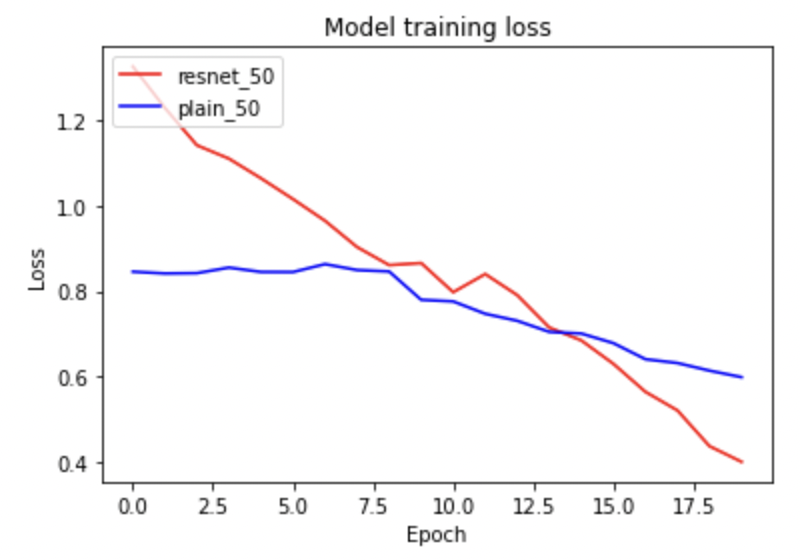|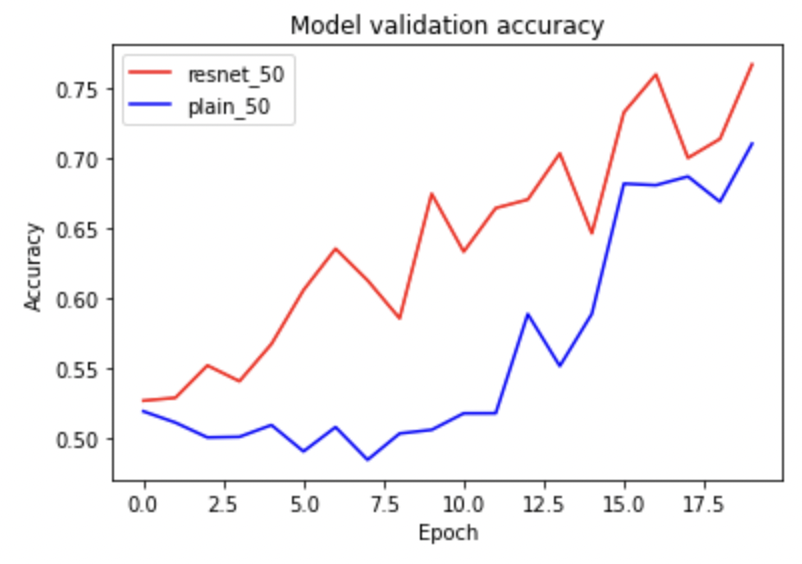|

### 3) batch size = 16, learning rate = 0.005
|resnet34 vs plain34(loss)|resnet34 vs plain34(accuracy)|resnet50 vs plain50(loss)|resnet50 vs plain50(accuracy)|
|---|---|---|---|
|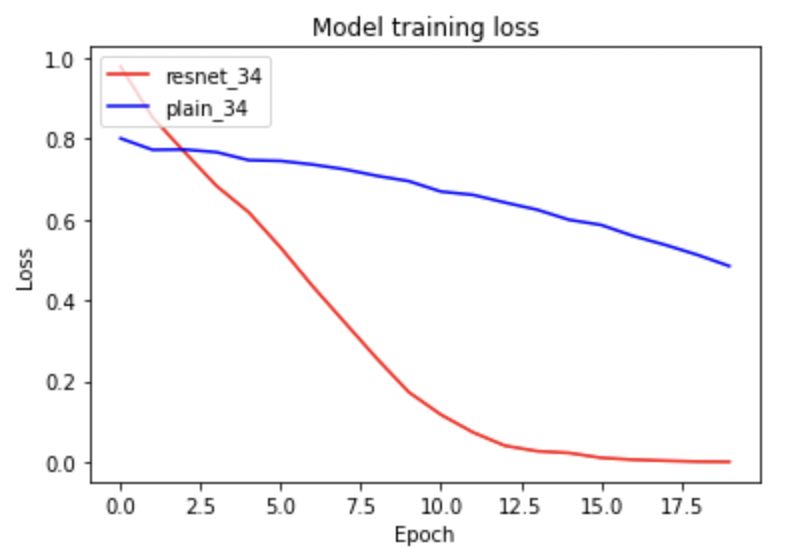|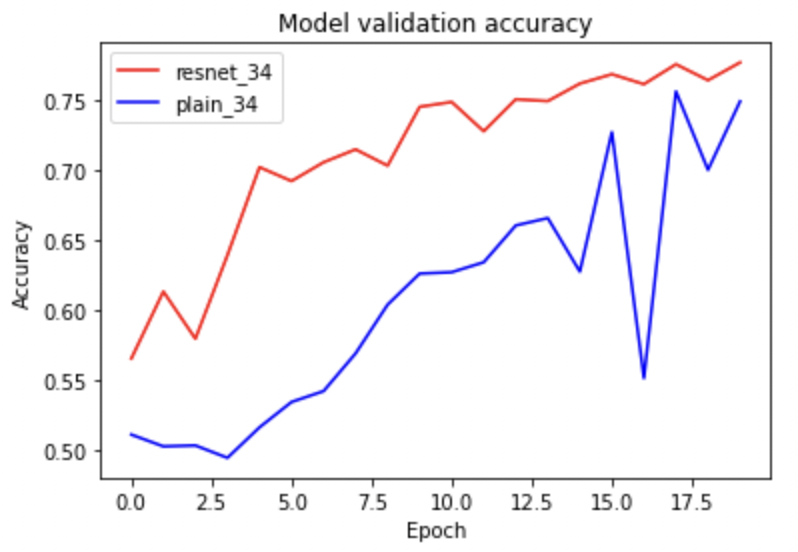|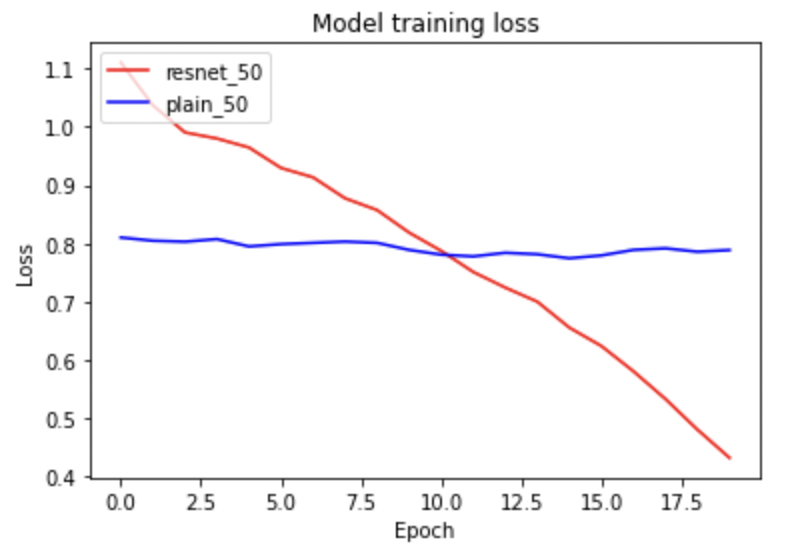|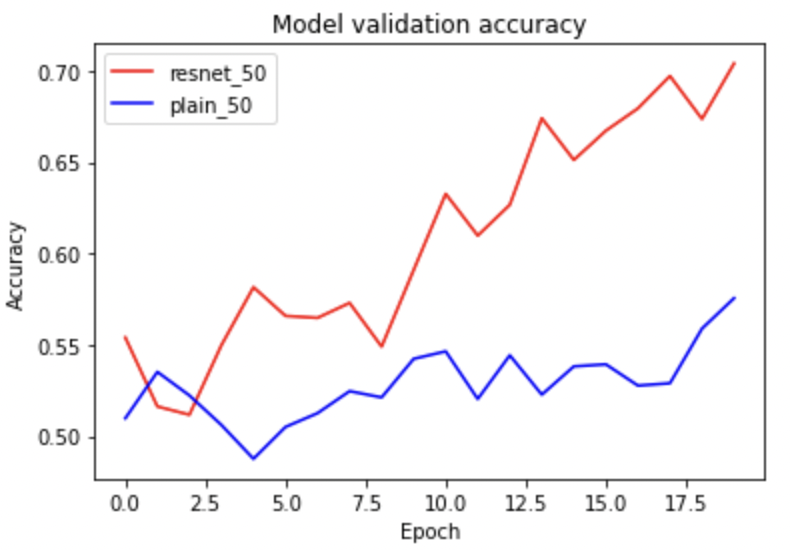|

-> batch size = 16, learning rate = 0.005일 때가 가장 예상한 대로 결과가 나왔다.